In [1]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('features_data.csv')

In [3]:
features_data = df.sort('timestamp')

/home/shubham/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [4]:
features_data.head()

,Unnamed: 0,timestamp,x_acc_cf,x_acc_p2p,x_acc_peak,x_acc_rms,x_acc_shaft1x,x_acc_shaft2x,x_acc_shaft3x,x_acc_shaft3xto10xsum,...,z_acc_shaft3x,z_acc_shaft3xto10xsum,z_vel_cf,z_vel_p2p,z_vel_peak,z_vel_rms,z_vel_shaft1x,z_vel_shaft2x,z_vel_shaft3x,z_vel_shaft3xto10xsum
916,916,2016-04-25 11:49:28,3.903191,1.225533,0.636245,0.163006,0.071948,0.054743,0.017191,0.085824,...,0.022512,0.102806,2.451221,12.767854,6.703367,2.734706,3.176619,0.200449,0.196440,0.647047
917,917,2016-04-25 14:49:34,3.930911,0.761220,0.388983,0.098955,0.057149,0.027294,0.004860,0.049142,...,0.011718,0.033943,2.140221,9.747912,4.999015,2.335747,3.162190,0.047695,0.102206,0.196012
918,918,2016-04-25 17:49:39,4.161250,0.848132,0.442576,0.106356,0.052243,0.022981,0.003703,0.039185,...,0.008876,0.027538,2.313496,9.629319,5.042790,2.179727,2.588635,0.083741,0.077680,0.159285
919,919,2016-04-25 20:49:43,4.138266,1.005279,0.513804,0.124159,0.051388,0.035749,0.006357,0.044378,...,0.009249,0.034718,2.677693,11.760224,6.496227,2.426054,2.883996,0.088031,0.080232,0.193030
920,920,2016-04-25 23:49:48,4.468325,1.042656,0.568799,0.127296,0.055974,0.035657,0.004367,0.039532,...,0.007997,0.025544,2.137463,9.232612,4.650337,2.175634,2.634484,0.098633,0.069684,0.151457


In [5]:
features = features_data.drop(['Unnamed: 0', 'timestamp'], axis = 1)

In [6]:
features.head()

,x_acc_cf,x_acc_p2p,x_acc_peak,x_acc_rms,x_acc_shaft1x,x_acc_shaft2x,x_acc_shaft3x,x_acc_shaft3xto10xsum,x_vel_cf,x_vel_p2p,...,z_acc_shaft3x,z_acc_shaft3xto10xsum,z_vel_cf,z_vel_p2p,z_vel_peak,z_vel_rms,z_vel_shaft1x,z_vel_shaft2x,z_vel_shaft3x,z_vel_shaft3xto10xsum
916,3.903191,1.225533,0.636245,0.163006,0.071948,0.054743,0.017191,0.085824,2.745169,10.990631,...,0.022512,0.102806,2.451221,12.767854,6.703367,2.734706,3.176619,0.200449,0.196440,0.647047
917,3.930911,0.761220,0.388983,0.098955,0.057149,0.027294,0.004860,0.049142,2.669736,5.980987,...,0.011718,0.033943,2.140221,9.747912,4.999015,2.335747,3.162190,0.047695,0.102206,0.196012
918,4.161250,0.848132,0.442576,0.106356,0.052243,0.022981,0.003703,0.039185,2.662218,6.929793,...,0.008876,0.027538,2.313496,9.629319,5.042790,2.179727,2.588635,0.083741,0.077680,0.159285
919,4.138266,1.005279,0.513804,0.124159,0.051388,0.035749,0.006357,0.044378,2.802976,7.128366,...,0.009249,0.034718,2.677693,11.760224,6.496227,2.426054,2.883996,0.088031,0.080232,0.193030
920,4.468325,1.042656,0.568799,0.127296,0.055974,0.035657,0.004367,0.039532,2.856010,7.291679,...,0.007997,0.025544,2.137463,9.232612,4.650337,2.175634,2.634484,0.098633,0.069684,0.151457


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
print(pca.explained_variance_ratio_)

[ 0.63425731  0.14417752  0.09583945  0.05018117  0.02664752]


In [9]:
features_new = pca.transform(features)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

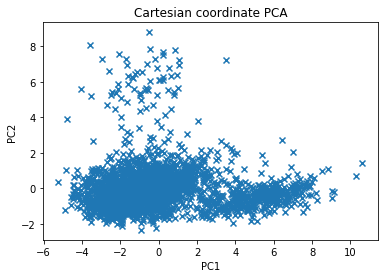

In [11]:
plt.figure()
plt.scatter(features_new[:, 0], features_new[:,1], marker='x')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cartesian coordinate PCA')

In [12]:
features_df = pd.DataFrame(features_new)

In [13]:
features_df.head()

,0,1,2,3,4
0,2.151916,-0.678912,1.062950,1.331556,0.975780
1,-4.061705,5.612440,2.035588,0.393836,-1.886367
2,-3.415980,0.799900,-0.950916,0.903888,-0.414995
3,-1.691408,7.297119,4.153357,-0.444040,-0.244204
4,-3.530006,0.267161,-0.532192,1.292108,-0.507775


In [14]:
size = len(features_df)

In [15]:
size

2550

In [16]:
baseline_size = int(0.2 * size)

In [17]:
baseline_size

510

In [18]:
X_train = features_df.head(n = baseline_size)

In [19]:
X_test = features_df.tail(size-baseline_size)

In [20]:
X_train_copy = X_train.copy(deep = True)
X_test_copy = X_test.copy(deep = True)

In [21]:
X_train_copy['health'] = np.nan
X_test_copy['health'] = np.nan

In [22]:
X_train.head()

,0,1,2,3,4
0,2.151916,-0.678912,1.062950,1.331556,0.975780
1,-4.061705,5.612440,2.035588,0.393836,-1.886367
2,-3.415980,0.799900,-0.950916,0.903888,-0.414995
3,-1.691408,7.297119,4.153357,-0.444040,-0.244204
4,-3.530006,0.267161,-0.532192,1.292108,-0.507775


In [23]:
import math
nu_range = range(9, 0, -1)
for nu in nu_range:
    nu_updated = nu * 0.1
    print nu_updated
    clf = svm.OneClassSVM(kernel = "rbf", gamma = 0.1, nu = nu_updated)
    clf.fit(X_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    X_train_copy['anomaly'] = pd.DataFrame(y_pred_train)
    X_test_copy['anomaly'] = pd.DataFrame(y_pred_test)
    for index, row in X_train_copy.iterrows():
        if row['anomaly'] == 1 and math.isnan(row['health']):
            row['health'] = nu + 1
    for index1, row1 in X_test_copy.iterrows():
        if row1['anomaly'] == 1 and math.isnan(row1['health']):
            row1['health'] = nu + 1

0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1


In [24]:
for index, row in X_train_copy.iterrows():
    if math.isnan(row['health']):
            row['health'] = 1
for index, row in X_test_copy.iterrows():
    if math.isnan(row['health']):
            row['health'] = 1

In [25]:
X_train_copy.describe()

,0,1,2,3,4,health,anomaly
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000
mean,-1.290638,1.033781,-0.033156,0.130054,-0.035180,5.50000,0.811765
std,1.339166,1.923918,1.477551,0.653893,0.459896,2.86963,0.584558
min,-5.238858,-1.280220,-2.737714,-1.788521,-1.886367,1.00000,-1.000000
25%,-2.195054,0.008438,-0.927955,-0.310551,-0.348968,3.00000,1.000000
50%,-1.293918,0.458764,-0.435944,0.084983,-0.044151,5.50000,1.000000
75%,-0.350806,1.045626,0.285493,0.564746,0.233624,8.00000,1.000000
max,3.514466,8.777026,5.783990,2.807821,1.634785,10.00000,1.000000


In [30]:
health_df = pd.concat([X_train_copy, X_test_copy])
health_df.drop('anomaly', axis = 1, inplace = True)

In [31]:
health_df.head()

,0,1,2,3,4,health
0,2.151916,-0.678912,1.062950,1.331556,0.975780,1.0
1,-4.061705,5.612440,2.035588,0.393836,-1.886367,1.0
2,-3.415980,0.799900,-0.950916,0.903888,-0.414995,4.0
3,-1.691408,7.297119,4.153357,-0.444040,-0.244204,2.0
4,-3.530006,0.267161,-0.532192,1.292108,-0.507775,3.0


In [33]:
health_score= pd.Series(health_df.health)

In [34]:
features_data['health'] = pd.DataFrame(health_score)

In [35]:
features_data.head()

,Unnamed: 0,timestamp,x_acc_cf,x_acc_p2p,x_acc_peak,x_acc_rms,x_acc_shaft1x,x_acc_shaft2x,x_acc_shaft3x,x_acc_shaft3xto10xsum,...,z_acc_shaft3xto10xsum,z_vel_cf,z_vel_p2p,z_vel_peak,z_vel_rms,z_vel_shaft1x,z_vel_shaft2x,z_vel_shaft3x,z_vel_shaft3xto10xsum,health
916,916,2016-04-25 11:49:28,3.903191,1.225533,0.636245,0.163006,0.071948,0.054743,0.017191,0.085824,...,0.102806,2.451221,12.767854,6.703367,2.734706,3.176619,0.200449,0.196440,0.647047,1.0
917,917,2016-04-25 14:49:34,3.930911,0.761220,0.388983,0.098955,0.057149,0.027294,0.004860,0.049142,...,0.033943,2.140221,9.747912,4.999015,2.335747,3.162190,0.047695,0.102206,0.196012,1.0
918,918,2016-04-25 17:49:39,4.161250,0.848132,0.442576,0.106356,0.052243,0.022981,0.003703,0.039185,...,0.027538,2.313496,9.629319,5.042790,2.179727,2.588635,0.083741,0.077680,0.159285,1.0
919,919,2016-04-25 20:49:43,4.138266,1.005279,0.513804,0.124159,0.051388,0.035749,0.006357,0.044378,...,0.034718,2.677693,11.760224,6.496227,2.426054,2.883996,0.088031,0.080232,0.193030,9.0
920,920,2016-04-25 23:49:48,4.468325,1.042656,0.568799,0.127296,0.055974,0.035657,0.004367,0.039532,...,0.025544,2.137463,9.232612,4.650337,2.175634,2.634484,0.098633,0.069684,0.151457,4.0
